# Lecture 5  Classification Model - Logistic Regression

In [1]:
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## 1. Logistic Regression

Logistic regression is realized through 

**<center>sklearn.linear_model.LogisticRegression</center>**

- By default, **L2 regularization is applied**. Use `penalty = 'none'` if you do not want to include regularization.
- You can still use **.coef_** and **.intercept_** to get `coefficient` estimates.
- By default, **.score** reports the accuracy
- A new attribute is **.predict_proba**. It gives the predicted probability of y=1 (instead of the class).

### Setting and Data
We will use a standard dataset that predicts breast cancer for today's practice. The breast_cancer dataset comes with Scikit-Learn package. This is a binary classification dataset (i.e., Y=1 if malignant, Y=0 if benign). We can use the same syntax to learn about the breast_cancer dataset (e.g., variables, observations, etc.) 

It's description can also be found at: <center>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer</center>



**Practice:** 
- Explore the cancer dataset, how many observations & variables are there?
- Data Splitting - 30% to test and 70% to train.
- Predict y with **Logistic Regression** and **L2 regularization**. Report the `coefficients` (including intercept).
- Report the accuracy of training and test set.
    - Hint: you can use `.score(x, y)` method to get accuracy. As accuracy is default measure for binary outcomes.
- Suppose another classifier: it classifies all records to class zero. What would be the accuracy? 

In [2]:
# Exploring dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys()) # Check elements in cancer dataset: data is X, target is y.
print(cancer.data.shape)

# Uncomment the following line for a detailed data description 
# print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)


In [3]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Compare the data distributions
print(np.mean(y_train), np.mean(y))

0.6256281407035176 0.6274165202108963


In [3]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Compare the data distributions
print(np.mean(y_train), np.mean(y))

0.6256281407035176 0.6274165202108963


In [5]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("coef is: ", logreg.coef_)


## (b) Accuracy
print("Accuracy is:", logreg.score(X_test, y_test) )

# Get it manually

# do prediction
y_pred = logreg.predict(X_test)

print("Manully calculate the accuracy: ", np.sum(y_test == y_pred)/y_test.shape[0]) 

coef is:  [[ 1.02625152  0.48887475  0.24299186 -0.01783467 -0.03745147 -0.18327512
  -0.25810701 -0.11109943 -0.05714721 -0.0114544   0.03358767  0.45573986
   0.06794771 -0.10634767 -0.00353029 -0.03861955 -0.05301724 -0.01415871
  -0.01385401 -0.00358298  1.04562759 -0.54674108 -0.23366171 -0.01168843
  -0.06737273 -0.55489036 -0.69084366 -0.2047804  -0.18628862 -0.05116326]]
Accuracy is: 0.9707602339181286
Manully calculate the accuracy:  0.9707602339181286


In [6]:
# Suppose another classifier: it classifies all records to class zero. What would be the accuracy?

np.sum(y_test == 0)/y_test.shape[0]

0.3684210526315789

## 2. Model Evaluation
We have several ways to evaluate a classification model. 

### 2.1 Confusion Matrix
It is often good start from **Confusion Matrix**, which provides the source (e.g., TP, TN, FP, FN) to calculate other measures. Checking the patterns of confusion matrix can also help understand which type of error is more likely to occur (FP or FN) and the potential reasons (classifier's issue or data issue).

<img src="https://miro.medium.com/max/1400/1*PPgItHcPSaskyjLMWFC-Kw.png" width=600 />

To generate confusion matrix, we use syntax:
**<center>sklearn.metrics.confusion_matrix(Actual_y, Predicted_y)</center>**

- The rows represents actual class, and columns represent predicted class. 
- For the upper-left corner, `predicted = actual = 0`

**Practice:**
- Create a confusion matrix for the logistic regression model, report the TP, FP, TN, FN.

In [7]:
from sklearn.metrics import confusion_matrix
my_matrix=confusion_matrix(y_test, y_pred)
my_matrix

array([[ 59,   4],
       [  1, 107]], dtype=int64)

In [8]:
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 107
TN is: 59
FP is: 4
FN is: 1


### Additional Performance Measures
We can obtain different performance measures, **Accuracy, Precision, Recall, F1 score**, using Scikit-Learn. The syntax is very similar to confusion matrix. Specifically, we can simply replace "confusion_matrix" by [accuracy_score, precision_score, recall_score, and f1_score]. Thus:

<center>sklearn.metrics.accuracy_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.precision_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.recall_score(Actual_y, Predicted_y)</center>
<center>sklearn.metrics.f1_score(Actual_y, Predicted_y)</center>

**Practice:**

- Given the logistic regression trained in the previous section, calculate and print the precision, recall, accuracy, and f1_score

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, y_pred) )
print('Recall score:', recall_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision score: 0.963963963963964
Recall score: 0.9907407407407407
Accuracy score: 0.9707602339181286
F1 score: 0.9771689497716894


### Visualization
We consider two methods for visualization: Precision-Recall Curve, and ROC Curve. Recall that to draw the figure, we need to calculate the probability of Y=1 for each record. Thus, we need to first obtain the predicted probability of Y=1 using the .predict_proba method:

**<center>MODEL_NAME.predict_proba(INPUT_DATA)[:,1]</center>**
- `[:,1]` takes the second column of the output (the first column is P(Y=0))
- The list of probabilities can be used to draw figures.

#### For Precision-Recall Curve: 
 - Use **sklearn.metrics.precision_recall_curve(Actual_Y, Probability)** 
 - Output: a list of necessary measures (following this order): [precision, recall, threshold]
 - Plot the figure (e.g., plt.plot()).
 
#### For ROC Curve: 
 - Use **sklearn.metrics.roc_curve(Actual_Y, Probability)** 
 - Output: a list of necessary measures (following this order): [fpr (1-specificity), tpr (recall), threshold]
 - Plot the figure (e.g., plt.plot()).
 - We can also get AUC score using     **sklearn.metrics.roc_auc_score(Actual_Y, Probability)**

**Practice:**

1. Plot the Precision-Recall Curve
2. Plot the ROC Curve
3. Obtain the AUC score

Text(0.5, 1.0, 'precision-Recall Curve')

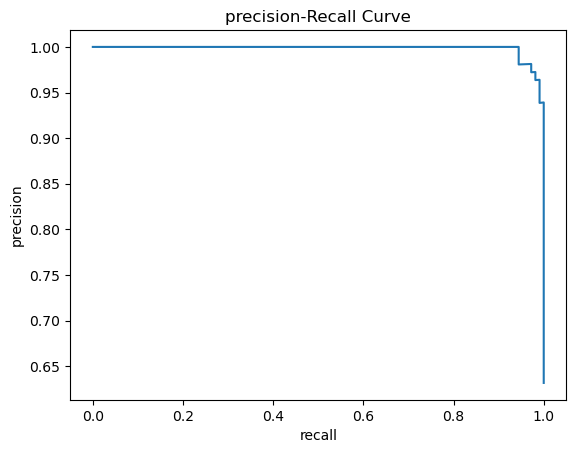

In [11]:
# Practice 1: Here we plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# S1. Get probability
log_reg_prob = logreg.predict_proba(X_test)[:, 1]

# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test, log_reg_prob)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision-Recall Curve")

In [12]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: y_pred_proba


print("AUC for logistic regression:",  roc_auc_score(y_test, log_reg_prob) )

AUC for logistic regression: 0.9970605526161082


Text(0.5, 1.0, 'ROC')

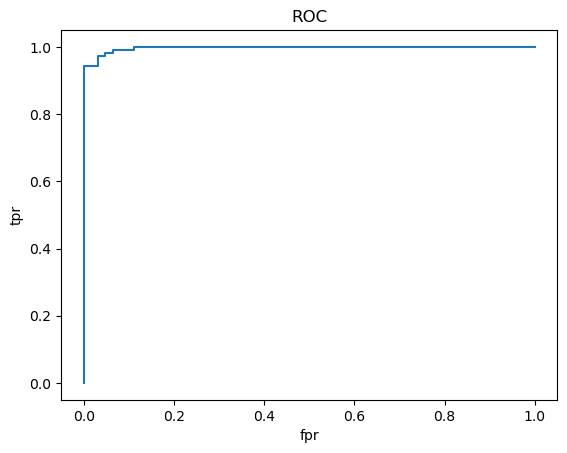

In [13]:
# Practice 2: Similar to Precision-Recall Curve

from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures

# Generate Figure
fpr, tpr, threshold =  roc_curve(y_test, log_reg_prob)

plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC")
